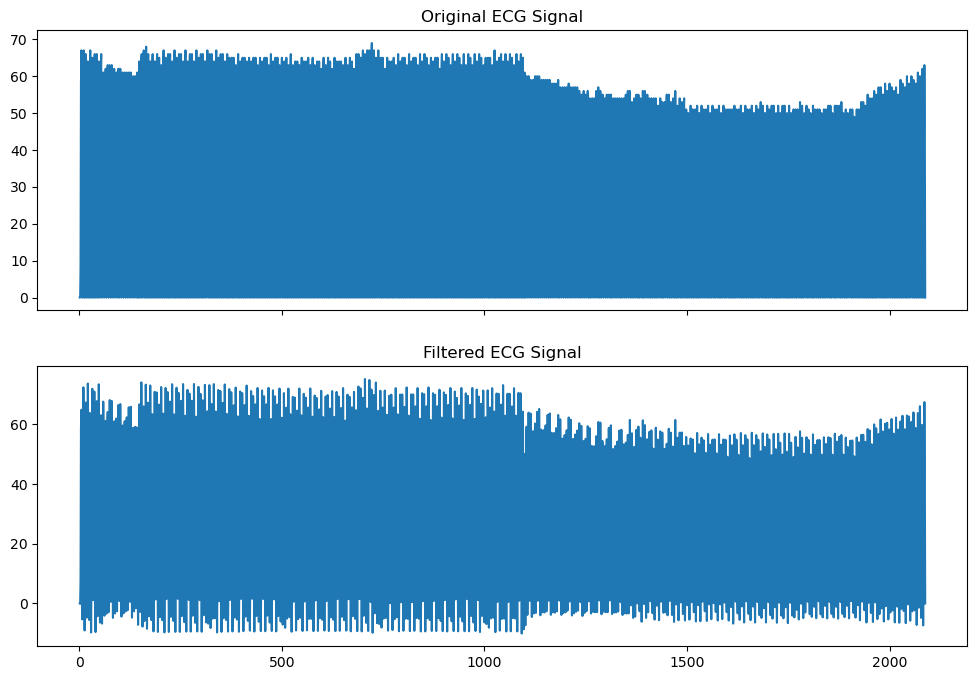

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt

# Load ECG signal data into a pandas DataFrame
ecg_data = pd.read_csv("C:/videopp/dew ecg.csv")
fs=100
# Define filter parameters
nyquist_freq = 0.5 * fs
cutoff_freq = 40  # Hz
filter_order = 4

# Compute filter coefficients using Butterworth filter
b, a = butter(filter_order, cutoff_freq/nyquist_freq, btype='lowpass')

# Filter the ECG signal using the filter coefficients
filtered_ecg = filtfilt(b, a, ecg_data.iloc[0:,1])

# Plot the original and filtered ECG signals
fig, ax = plt.subplots(2, 1, figsize=(12, 8), sharex=True)
ax[0].plot(ecg_data.iloc[0:,0], ecg_data.iloc[0:,1])
ax[0].set_title('Original ECG Signal')
ax[1].plot(ecg_data.iloc[0:,0], filtered_ecg)
ax[1].set_title('Filtered ECG Signal')
plt.show()


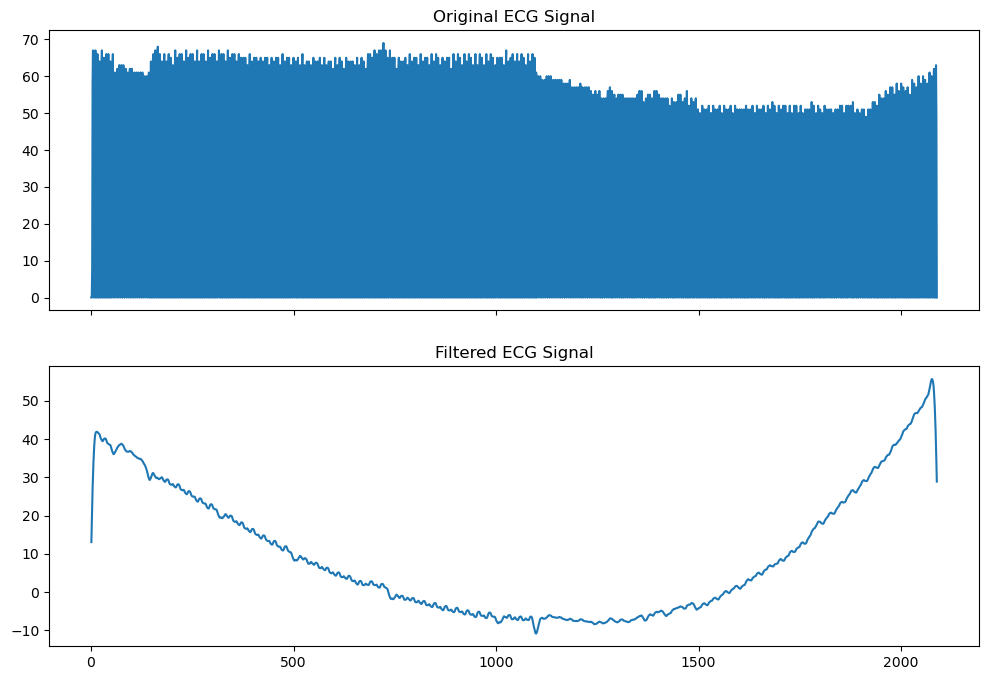

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt

# Load ECG signal data into a pandas DataFrame
ecg_data = pd.read_csv("C:/videopp/dew ecg.csv")
fs=360
f1 = 0.1  # Low cutoff frequency
f2 = 15.0  # High cutoff frequency
# Define filter parameters
nyquist_freq = 0.5 * fs
filter_order = 2
Wn = [f1/nyquist_freq, f2/nyquist_freq]


# Compute filter coefficients using Butterworth filter
b, a = butter(filter_order, Wn, btype='band')

# Filter the ECG signal using the filter coefficients
filtered_ecg = filtfilt(b, a, ecg_data.iloc[0:,1])

# Create a new DataFrame with the filtered signal and time values
filtered_data = pd.DataFrame({'Time': ecg_data.iloc[0:,0], 'Signal': filtered_ecg})

# Save the filtered data to a new CSV file
filtered_data.to_csv("C:/heartsignal/filtered.csv", index=False)

# Plot the original and filtered ECG signals
fig, ax = plt.subplots(2, 1, figsize=(12, 8), sharex=True)
ax[0].plot(ecg_data.iloc[0:,0], ecg_data.iloc[0:,1])
ax[0].set_title('Original ECG Signal')
ax[1].plot(filtered_data.iloc[0:,0], filtered_data.iloc[0:,1])
ax[1].set_title('Filtered ECG Signal')
plt.show()


In [4]:
from sklearn.metrics import confusion_matrix

# True labels
y_true = [116, 155, 195]



# Predicted labels
y_pred = [128, 160, 191]


# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Print confusion matrix
print(cm)


[[0 1 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 1 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 1 0]]


In [ ]:
sensitivity = cm[1,1] / (cm[1,1] + cm[1,0])
print("Sensitivity:", sensitivity)

# Calculate positive predictive value
ppv = cm[1,1] / (cm[1,1] + cm[0,1])
print("Positive predictive value:", ppv)

# Calculate F1 score
f1_score = 2 * (sensitivity * ppv) / (sensitivity + ppv)
print("F1 score:", f1_score)
